In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF DONE

In [2]:
env='Pendulum-v1'
img_prefix =env.upper()
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMCACT"
print(df_comper.shape)

(1250, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(1250, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Pendulum-v1,22-09-2023 21:15:48,200,0,200,0.009941,1,201,False,-1438.192282,-1438.192282,-1438.192282,-1438.192282,-1438.192282,COMCACT
1,1,2,Pendulum-v1,22-09-2023 21:23:58,400,0,400,0.019882,1,401,False,-2874.430867,-2156.311575,-2156.311575,-2156.311575,-2156.311575,COMCACT
2,1,3,Pendulum-v1,22-09-2023 21:32:09,600,0,600,0.029822,1,601,False,-4352.088455,-2888.237201,-2888.237201,-2888.237201,-2888.237201,COMCACT
3,1,4,Pendulum-v1,22-09-2023 21:40:28,800,0,800,0.039763,1,801,False,-5864.527930,-3632.309883,-3632.309883,-3632.309883,-3632.309883,COMCACT
4,1,5,Pendulum-v1,22-09-2023 21:48:51,1000,0,1000,0.049704,1,1001,False,-7426.508294,-4391.149566,-4391.149566,-4391.149566,-4391.149566,COMCACT


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Pendulum-v1,03-10-2023 15:32:51,200,201,0,0.009941,1,201,False,-965.066799,-965.066799,-965.066799,-965.066799,-965.066799,DDPG
1,1,2,Pendulum-v1,03-10-2023 15:33:14,400,401,0,0.019882,1,401,False,-2125.564527,-1545.315663,-1545.315663,-1545.315663,-1545.315663,DDPG
2,1,3,Pendulum-v1,03-10-2023 15:33:38,600,601,0,0.029822,1,601,False,-3358.420879,-2149.684068,-2149.684068,-2149.684068,-2149.684068,DDPG
3,1,4,Pendulum-v1,03-10-2023 15:34:01,800,801,0,0.039763,1,801,False,-4763.633608,-2803.171453,-2803.171453,-2803.171453,-2803.171453,DDPG
4,1,5,Pendulum-v1,03-10-2023 15:34:25,1000,1001,0,0.049704,1,1001,False,-6334.943554,-3509.525873,-3509.525873,-3509.525873,-3509.525873,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Pendulum-v1,22-09-2023 21:15:48,200,0,200,0.009941,1,201,False,-1438.192282,-1438.192282,-1438.192282,-1438.192282,-1438.192282,COMCACT
1,1,2,Pendulum-v1,22-09-2023 21:23:58,400,0,400,0.019882,1,401,False,-2874.430867,-2156.311575,-2156.311575,-2156.311575,-2156.311575,COMCACT
2,1,3,Pendulum-v1,22-09-2023 21:32:09,600,0,600,0.029822,1,601,False,-4352.088455,-2888.237201,-2888.237201,-2888.237201,-2888.237201,COMCACT
3,1,4,Pendulum-v1,22-09-2023 21:40:28,800,0,800,0.039763,1,801,False,-5864.527930,-3632.309883,-3632.309883,-3632.309883,-3632.309883,COMCACT
4,1,5,Pendulum-v1,22-09-2023 21:48:51,1000,0,1000,0.049704,1,1001,False,-7426.508294,-4391.149566,-4391.149566,-4391.149566,-4391.149566,COMCACT


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
245,5,246,Pendulum-v1,03-10-2023 23:31:07,49200,34939,0,0.999,1,49201,False,-54218.879568,-45308.489510,-53354.059863,-54016.113598,-54196.793110,DDPG
246,5,247,Pendulum-v1,03-10-2023 23:31:32,49400,35051,0,0.999,1,49401,False,-54221.649042,-45344.575176,-53396.666117,-54025.116729,-54201.997668,DDPG
247,5,248,Pendulum-v1,03-10-2023 23:31:57,49600,35186,0,0.999,1,49601,False,-54224.980232,-45380.383261,-53431.720631,-54034.023624,-54206.946707,DDPG
248,5,249,Pendulum-v1,03-10-2023 23:32:22,49800,35365,0,0.999,1,49801,False,-54226.361594,-45415.909279,-53462.782168,-54042.814599,-54211.410039,DDPG
249,5,250,Pendulum-v1,03-10-2023 23:32:48,50000,35545,0,0.999,1,50001,True,-54227.702067,-45451.156450,-53493.764495,-54051.502084,-54215.183685,DDPG


In [8]:
#fig, axs = plt.subplots(nrows=2,ncols=2)
#fig.set_figwidth(15)
#fig.set_figheight(10)
#sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
#sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [9]:
path ='COMPER_DDPG/data_using_done/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMCACT"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,23-09-2023 00:34:58,Pendulum-v1,5000,-33.521398,COMCACT
1,1,23-09-2023 03:59:00,Pendulum-v1,10000,-27.334864,COMCACT
2,1,23-09-2023 07:23:20,Pendulum-v1,15000,-5.228811,COMCACT
3,1,23-09-2023 10:47:48,Pendulum-v1,20000,-0.887515,COMCACT
4,1,23-09-2023 14:24:10,Pendulum-v1,25000,-11.086585,COMCACT


In [10]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-17.702841
std,1.428571,14507.211437,16.694606
min,1.000000,5000.000000,-49.393819
25%,2.000000,15000.000000,-32.930393
50%,3.000000,27500.000000,-9.990021
75%,4.000000,40000.000000,-3.282033
max,5.000000,50000.000000,-0.084982


In [11]:
path ='DPPG/data_using_done/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,03-10-2023 15:41:49,Pendulum-v1,5000,-31.162822,DDPG
1,1,03-10-2023 15:50:46,Pendulum-v1,10000,-0.232810,DDPG
2,1,03-10-2023 15:59:55,Pendulum-v1,15000,-49.280279,DDPG
3,1,03-10-2023 16:09:12,Pendulum-v1,20000,-24.241620,DDPG
4,1,03-10-2023 16:18:39,Pendulum-v1,25000,-21.017104,DDPG


In [12]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-24.018042
std,1.428571,14507.211437,16.732854
min,1.000000,5000.000000,-50.925548
25%,2.000000,15000.000000,-36.805638
50%,3.000000,27500.000000,-23.470750
75%,4.000000,40000.000000,-11.138385
max,5.000000,50000.000000,-0.088274


In [13]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

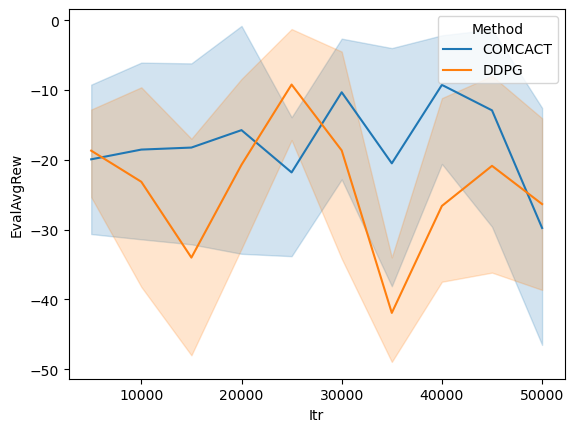

In [14]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [15]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,-50737.324609,COMCACT,-37587.914048
100,20200,-50995.244070,COMCACT,-38083.484566
101,20400,-51256.899402,COMCACT,-38567.309251
102,20600,-51391.999912,COMCACT,-39037.708366
103,20800,-51653.109151,COMCACT,-39495.594178


In [16]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,-74983.737910,DDPG,-56009.062481
100,20200,-74986.495764,DDPG,-56749.276770
101,20400,-74986.779430,DDPG,-57477.888919
102,20600,-74987.018563,DDPG,-58194.174896
103,20800,-74988.520363,DDPG,-58896.423764


In [17]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,-50737.324609,COMCACT,-37587.914048
100,20200,-50995.244070,COMCACT,-38083.484566
101,20400,-51256.899402,COMCACT,-38567.309251
102,20600,-51391.999912,COMCACT,-39037.708366
103,20800,-51653.109151,COMCACT,-39495.594178


In [18]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
245,49200,-54218.879568,DDPG,-53354.059863
246,49400,-54221.649042,DDPG,-53396.666117
247,49600,-54224.980232,DDPG,-53431.720631
248,49800,-54226.361594,DDPG,-53462.782168
249,50000,-54227.702067,DDPG,-53493.764495


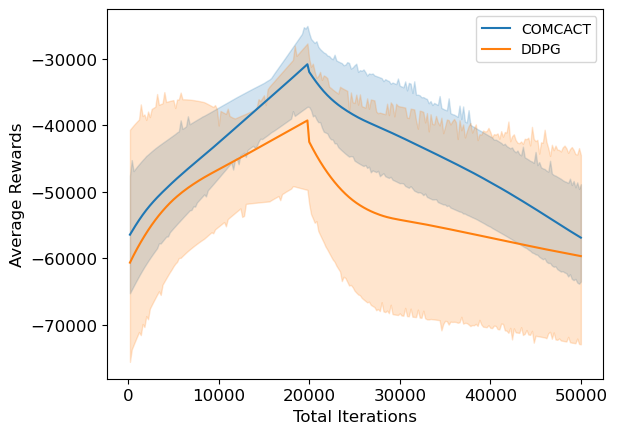

In [19]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')
plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=10)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_done_signal/"+img_prefix+"-DONE-TRAINING.png")

In [20]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-27.334864,COMCACT,-30.428131
2,15000,-5.228811,COMCACT,-16.281837
3,20000,-0.887515,COMCACT,-3.058163
4,25000,-11.086585,COMCACT,-5.987050
5,30000,-4.744161,COMCACT,-7.915373


In [21]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-0.232810,DDPG,-15.697816
2,15000,-49.280279,DDPG,-24.756544
3,20000,-24.241620,DDPG,-36.760949
4,25000,-21.017104,DDPG,-22.629362
5,30000,-20.279948,DDPG,-20.648526


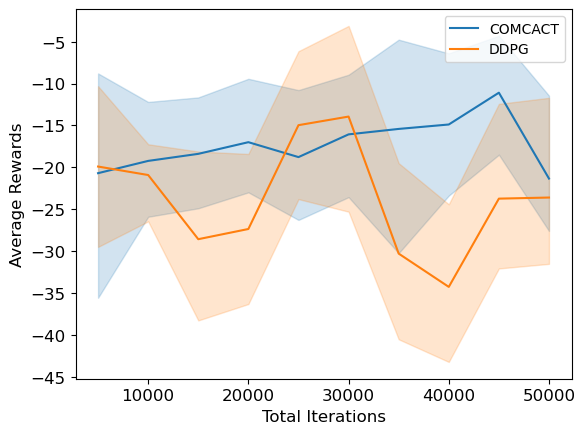

In [22]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')
plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=10)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_done_signal/"+img_prefix+"-DONE-EVALUATION.png")

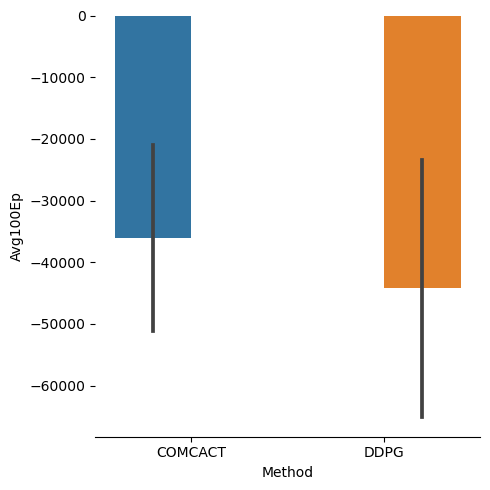

In [23]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

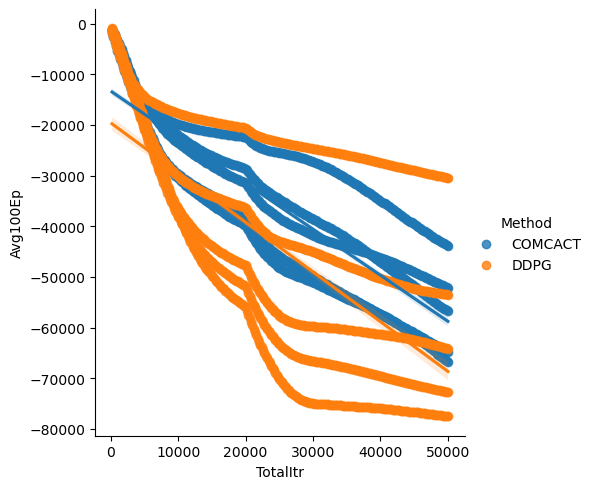

In [24]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)